In [2]:
import numpy as np
import pandas as pd
import torch
import seaborn as sns 
import matplotlib as plt


     x1    x2    x3    x4    x5
0  0.02  0.05 -0.09 -0.43 -0.08
1 -0.13  0.11 -0.08 -0.29 -0.03
2  0.08  0.06 -0.07 -0.41 -0.03
3  0.02 -0.12  0.01 -0.43 -0.02
4 -0.14 -0.12 -0.08 -0.02 -0.08


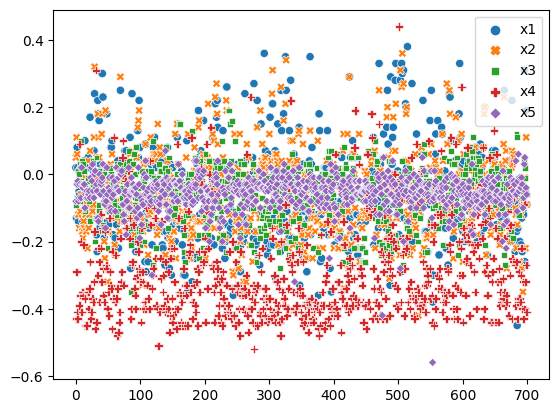

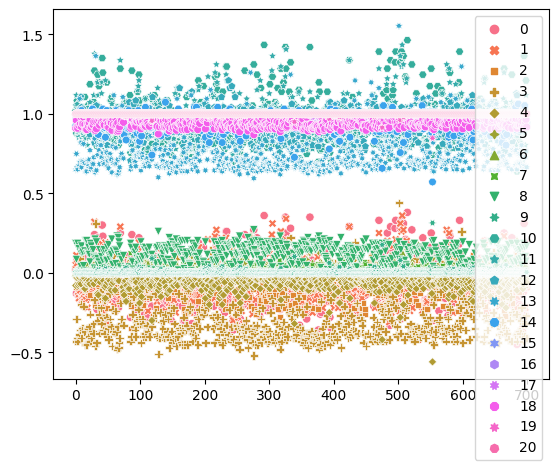

lr: 0.231
________________________
epoch: 5000
loss 1.9445263147354126
Validation loss: 1.9450353384017944
________________________


lr: 0.23111111111111113
________________________
epoch: 5000
loss 1.9446079730987549
Validation loss: 1.9481642246246338
________________________


lr: 0.23122222222222225
________________________
epoch: 5000
loss 1.9447284936904907
Validation loss: 1.9496251344680786
________________________


lr: 0.23133333333333334
________________________
epoch: 5000
loss 1.9447053670883179
Validation loss: 1.9487723112106323
________________________


lr: 0.23144444444444445
________________________
epoch: 5000
loss 1.9446592330932617
Validation loss: 1.9446630477905273
________________________


lr: 0.23155555555555557
________________________
epoch: 5000
loss 1.9445891380310059
Validation loss: 1.9527851343154907
________________________


lr: 0.2316666666666667
________________________
epoch: 5000
loss 1.9446651935577393
Validation loss: 1.944724202156067
_______

KeyboardInterrupt: 

In [16]:

def transform_data(X):
    """
    This function transforms the 5 input features of matrix X (x_i denoting the i-th component of X) 
    into 21 new features phi(X) in the following manner:
    5 linear features: phi_1(X) = x_1, phi_2(X) = x_2, phi_3(X) = x_3, phi_4(X) = x_4, phi_5(X) = x_5
    5 quadratic features: phi_6(X) = x_1^2, phi_7(X) = x_2^2, phi_8(X) = x_3^2, phi_9(X) = x_4^2, phi_10(X) = x_5^2
    5 exponential features: phi_11(X) = exp(x_1), phi_12(X) = exp(x_2), phi_13(X) = exp(x_3), phi_14(X) = exp(x_4), phi_15(X) = exp(x_5)
    5 cosine features: phi_16(X) = cos(x_1), phi_17(X) = cos(x_2), phi_18(X) = cos(x_3), phi_19(X) = cos(x_4), phi_20(X) = cos(x_5)
    1 constant features: phi_21(X)=1

    Parameters
    ----------
    X: matrix of floats, dim = (700,5), inputs with 5 features

    Returns
    ----------
    X_transformed: array of floats: dim = (700,21), transformed input with 21 features
    """
    X_transformed = np.zeros((700, 21))
    # TODO: Enter your code here
    for i in range(5):
        X_transformed[:,i] = X[:,i]
        X_transformed[:, i+5] = np.square(X[:,i])
        X_transformed[:,i+10] = np.exp(X[:,i])
        X_transformed[:,i+15] = np.cos(X[:,i])
    X_transformed[:,20] = 1
    sns.scatterplot(data=X_transformed)
    plt.pyplot.show()
    assert X_transformed.shape == (700, 21)
    return X_transformed

def validate(X, y, w):
    
    X_transformed = X
    X_validate = torch.from_numpy(X_transformed.astype(np.float32))
    y_validate = torch.from_numpy(y.reshape(y.shape[0],1).astype(np.float32))
    model_validate = torch.nn.Linear(21,1)
    model_validate.weight = torch.nn.Parameter(torch.from_numpy(w.reshape(1,21).astype(np.float32)))
  
    loss_func =  torch.nn.MSELoss()
    y_hat = model_validate(X_validate)
    loss = torch.sqrt(loss_func(y_hat, y_validate))
    print(f'Validation loss: {loss.item()}')

def fit(X, y, lr, momentum, epochs):
    """
    This function receives training data points, transform them, and then fits the linear regression on this 
    transformed data. Finally, it outputs the weights of the fitted linear regression. 

    Parameters
    ----------
    X: matrix of floats, dim = (700,5), inputs with 5 features
    y: array of floats, dim = (700,), input labels)

    Returns
    ----------
    w: array of floats: dim = (21,), optimal parameters of linear regression
    """
    X_train = torch.from_numpy(X.astype(np.float32))
    y_train = torch.from_numpy(y.reshape(y.shape[0],1).astype(np.float32))
    model = torch.nn.Linear(21,1, bias=False)
    loss_func = torch.nn.MSELoss()
    optimization = torch.optim.SGD(model.parameters(), lr, momentum)

    for epoch in range(epochs):
        y_hat = model(X_train)
        loss = torch.sqrt(loss_func(y_hat, y_train))
        loss.backward()
        optimization.step()
        optimization.zero_grad()
        if True == False:
            print(f'Epochs {epochs}: loss {loss.item()}')


    w = model.weight.detach().numpy().reshape(21)
    print(f'loss {loss.item()}')
    # TODO: Enter your code here
    assert w.shape == (21,)
    return w


# Main function. You don't have to change this
if __name__ == "__main__":
    # Data loading
    data = pd.read_csv("train.csv")
    y = data["y"].to_numpy()
    data = data.drop(columns=["Id", "y"])
    # print a few data samples
    print(data.head())
    sns.scatterplot(data=data)
    #show the plot
    plt.pyplot.show()


    X = transform_data(data.to_numpy())
    # Extract 80% of the data for training
    X_train = X[:700, :]
    y_train = y[:700]
    # Extract 20% of the data for validation
    X_val = X[550:, :]
    y_val = y[550:]
    # Fit the model
    
    for lr in np.linspace(0.2310, 0.232, 10):
        print(f'lr: {lr}', end="\n")
        print('________________________')
        for momentum in [0.1]:
            
            for epochs in [5000]:
                print(f'epoch: {epochs}')
                w = fit(X_train, y_train, lr, momentum, epochs)
                # Compute the validation loss
                validate(X_train, y_train, w)
        print('________________________', end="\n\n\n")
    
    
    # Save results in the required format
    np.savetxt("./results.csv", w, fmt="%.12f")
